# California Housing Data
A machine learning model that is trained on California Housing Prices

## Fit a tree-based model

In this notebook, I took the opportunity to fit a tree-based model to a modified version of the California housing data in order to get an understanding of how some of the features are associated with the response variable. The aim of this exercise is to predict median house prices. To determine what effect location has on house values, use the latitude and longitude features to train the tree-based model. Note the coordinates refer to the centre of each block. The variable names are given in Table 1.

| Variable | Description ||
| :- | :- | :-: |
| longitude | A geographic coordinate that indicates the east–west position |
| latitude | A geographic coordinate that indicates the north–south position |
| median_house_value | Median house prices per census block |




### Import libraries and the dataset

In [1]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
import matplotlib.pyplot as plt

The California housing data was obtained from [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices). The dataset is licensed under a [CC0 1.0](https://creativecommons.org/publicdomain/zero/1.0/) license.


In [2]:
# Import data
df = pd.read_csv('California Housing Data.csv', delimiter = ",")

### Data analysis

In [3]:
# Explore the size of the data set
df.shape


(20640, 10)

In [4]:
# Explore the type of data and feature names
df.head(8)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


Using `longitude` and `latitude` as features and `median_house_value` as the response.

In [15]:
# Using df.describe to explore the fields

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Describe returns 9 columns. Ocean_proximity excluded.




>"The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values."


[w3resource.com](https://www.w3resource.com/pandas/dataframe/dataframe-describe.php)

In [16]:
# Attribute ocean_promixity did not contribute in summary of the central tencencies.
# Exploring ocean_proximity. 

df["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [19]:
df["ocean_proximity"].count

<bound method Series.count of 0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object>

In [5]:
# Split data into features (X) and response (y)
X = df.loc[:,["latitude","longitude"]]
y = df.loc[:,["median_house_value"]]

X.head()
y.tail()


,median_house_value
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0
20639,89400.0


In [6]:
# Fit data to tree-based regression model

regressor = DecisionTreeRegressor(random_state=0)
regressor = regressor.fit(X,y)


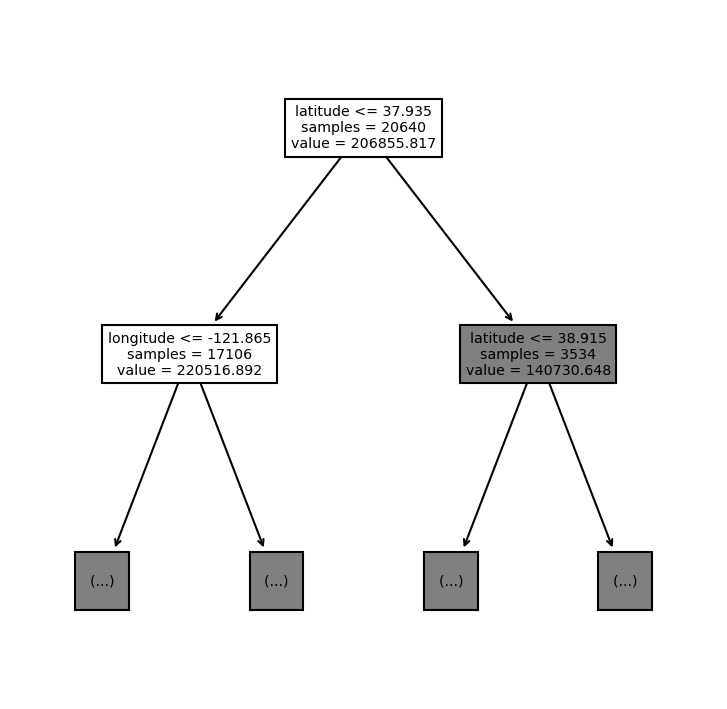

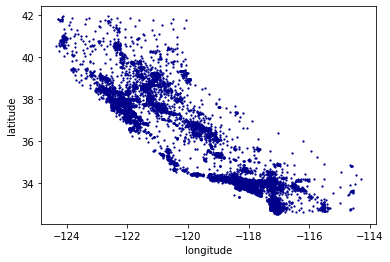

In [7]:
# Visualising the decision tree regression results after the split.

plt.figure(figsize=(6,6), dpi=150)
plot_tree(regressor,max_depth=1,feature_names=X.columns, impurity=False)
plt.show()

# A scatter plot of latitude vs longitude
df.plot.scatter(x='longitude',y='latitude',c='DarkBlue',s=1.5)



In [14]:
#data type || df.info() has more details
#df['ocean_proximity'].dtype

df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

The attribute 'Ocean_proximity' is an object type. The rest of the attributes are numeric

In [9]:
#insigts from the data

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [12]:
print("Dataframe has null values?", df.isnull().values.any())


Dataframe has null values? True


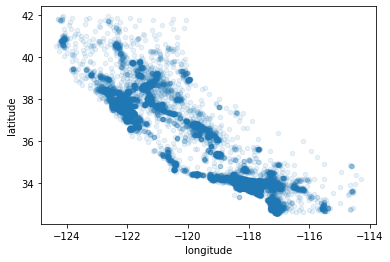

In [14]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

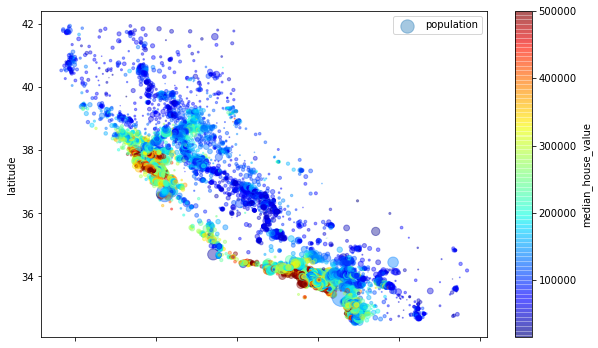

In [21]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=df["population"]/100, label="population",
        c="median_house_value", cmap=plt.get_cmap("jet"),
        colorbar=True, figsize=(10,6))
plt.legend()



# plt.figure(figsize=(10,6))
# plt.scatter(x=df['longitude'],y='latitude'],alpha=0.5,s=df['population']/30,c=df['median_house_value'])
# plt.colorbar()
# plt.title("Distribution of households",size=16)

The plot indicates that,
Median_house_value is influenced by the location. 
Housing closer to the sea have high prices